# Homework 5

The block below imports the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

## 1. Visualization

Read in `impurity_dataset-training.xlsx` and clean the data using the code provided in the Skill Check and lecture notes. The result should be a matrix, `X` with all input data (all columns except for the last 5) and a vector, `y` with impurity values (third to last column). All values should be floating point numbers.

In [2]:
df = pd.read_excel('impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

When working with a high-dimensional data, visualizing the distribution of each feature helps understand the range and distribution of each feature. Plot the distributions of all 40 features as histograms. The code below sets up an 8x5 array of axes which you can use if you wish.

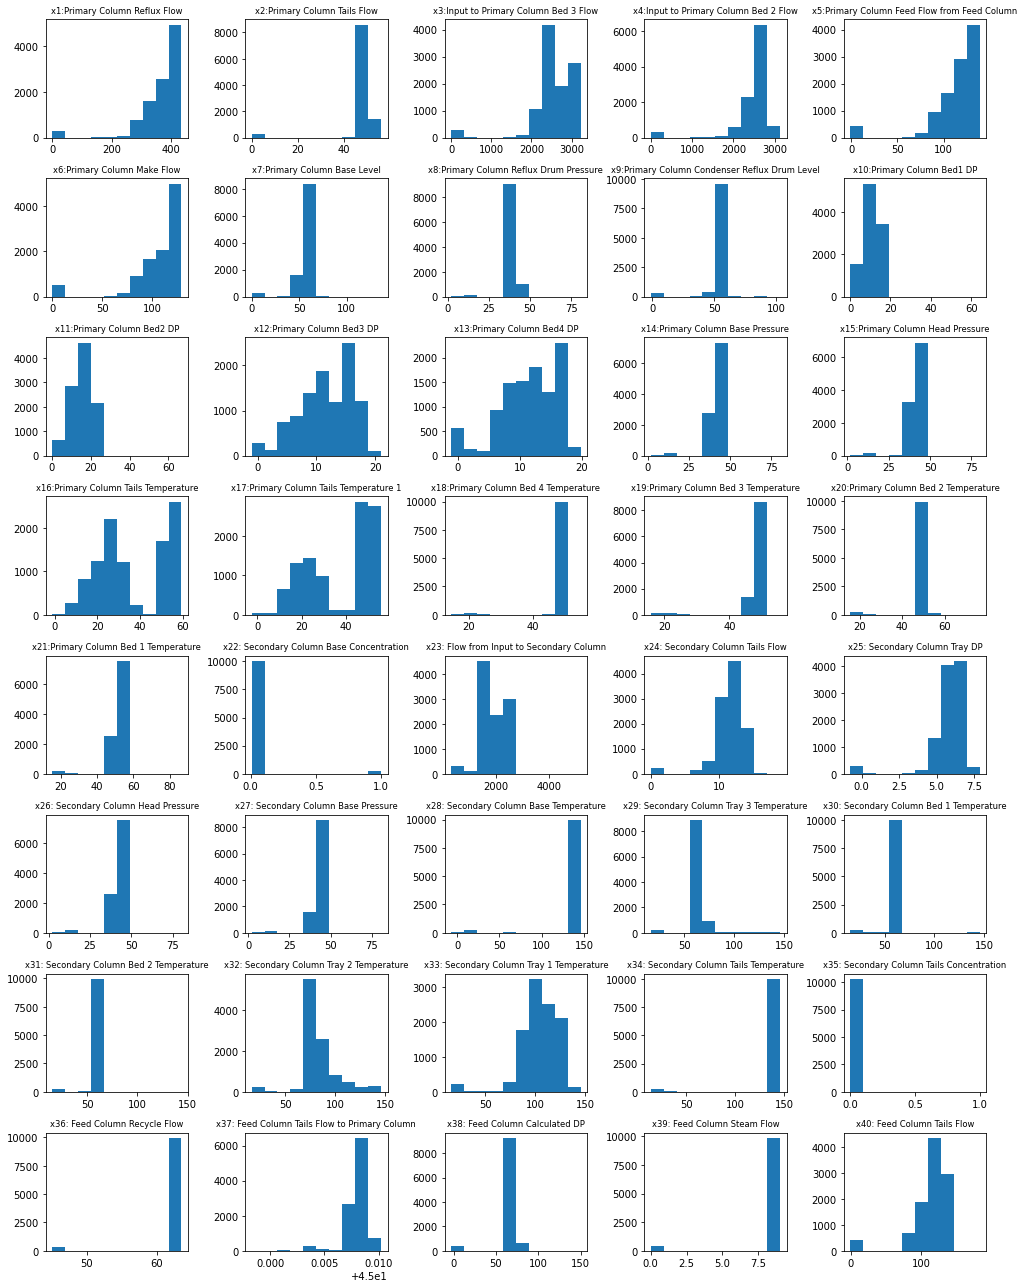

In [8]:
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X[:, i])
    ax.set_title(df.columns[i + 1], fontsize = 'small')

plt.tight_layout()

You want to identify outliers for each feature. However, it can be difficult to detect outliers in the original scale. Re-plot the feature histograms with standard-scaled `X` matrix.

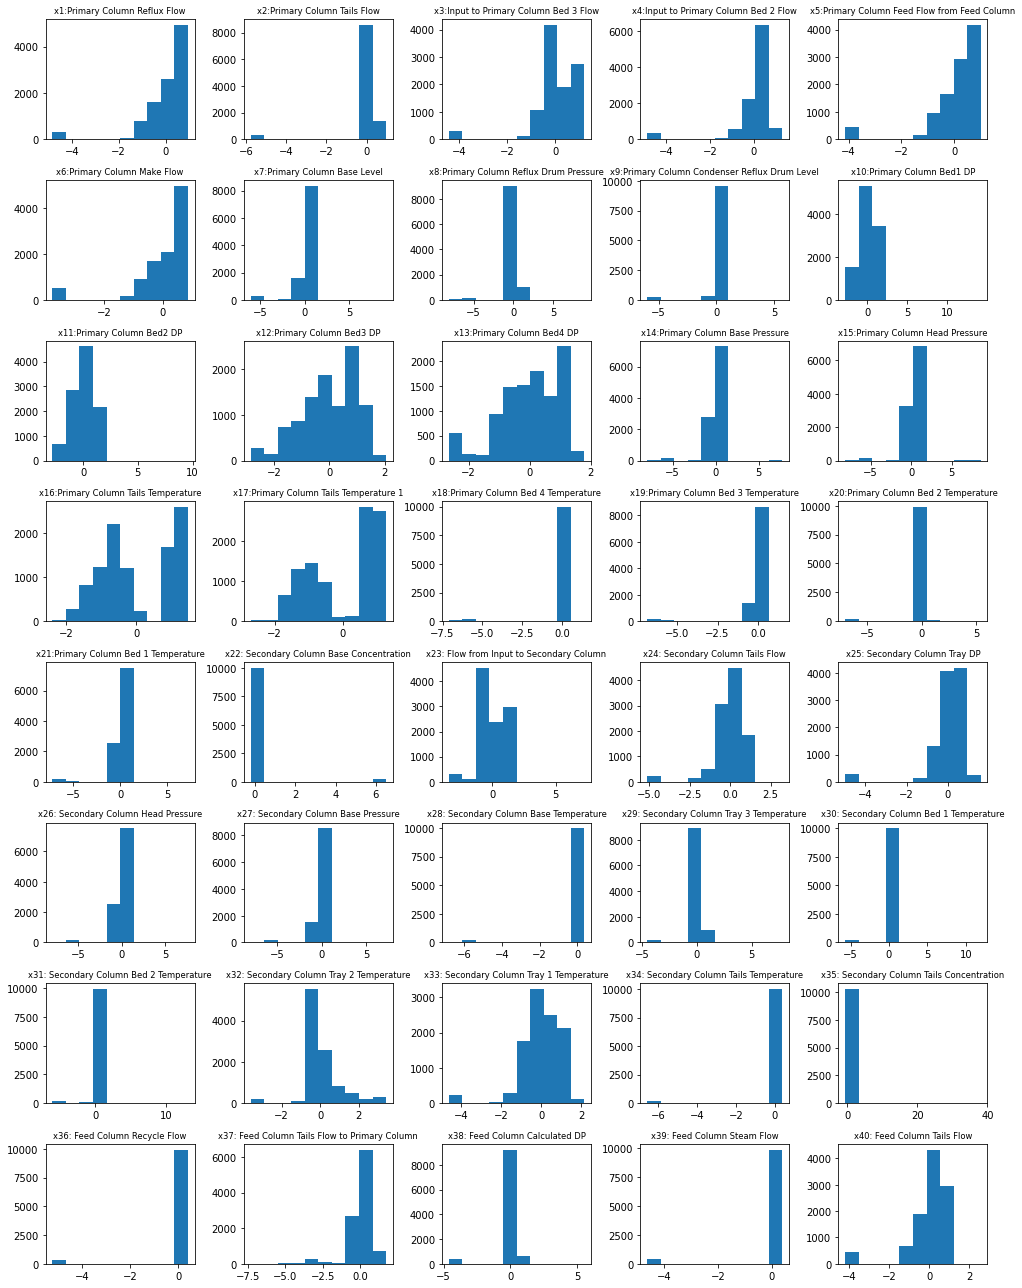

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X_scaled[:, i])
    ax.set_title(df.columns[i + 1], fontsize = 'small')

plt.tight_layout()

List the name of features that have outliers based on the definition of outliers being data points that are more than 3$\sigma$ away from the mean. Briefly describe how you came to this conclusion based on the plots above (or another analysis).

It is easy to find outliers when we plot histograms of standardized features where 1 on the x-axis corresponds to the standard deviation $\sigma$. Based on visual inspection, almost all of the features have outliers.

## 2. Principal Component Analysis

As we've learned from the lectures, PCA decomposes a dataset into directions based on maximizing the variance along each principal component vector. In this problem, you will see the relationship between variance and linear correlation with the target values.

Create a scatter plot of the data projected onto the first two principal component vectors. You may use linear algebra or the built-in scikit-learn PCA implementation to achieve this. The number of points on the scatter plot should be equal to the number of rows in the matrix `X`.

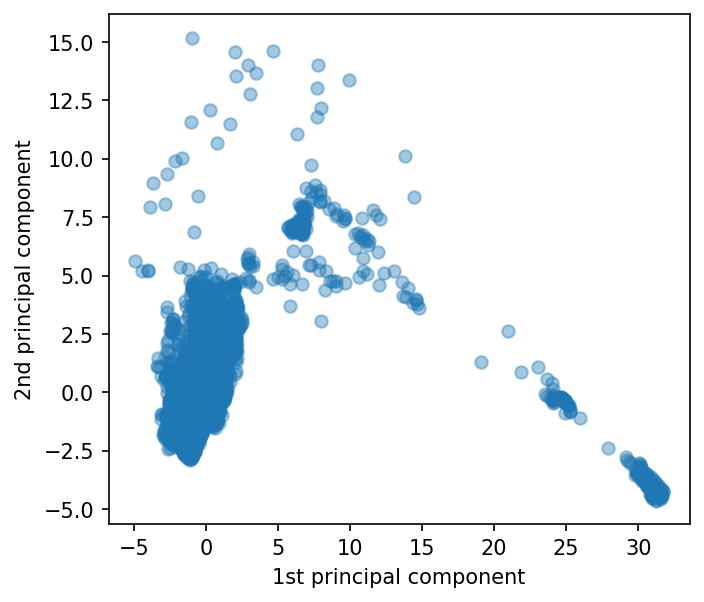

In [11]:
# Using eig function
from scipy.linalg import eig

corr = np.corrcoef(X.T)
eigvals, eigvecs = eig(corr)
PC_projection = np.dot(X_scaled, eigvecs)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(PC_projection[:, 0], PC_projection[:, 1], alpha = .4)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');

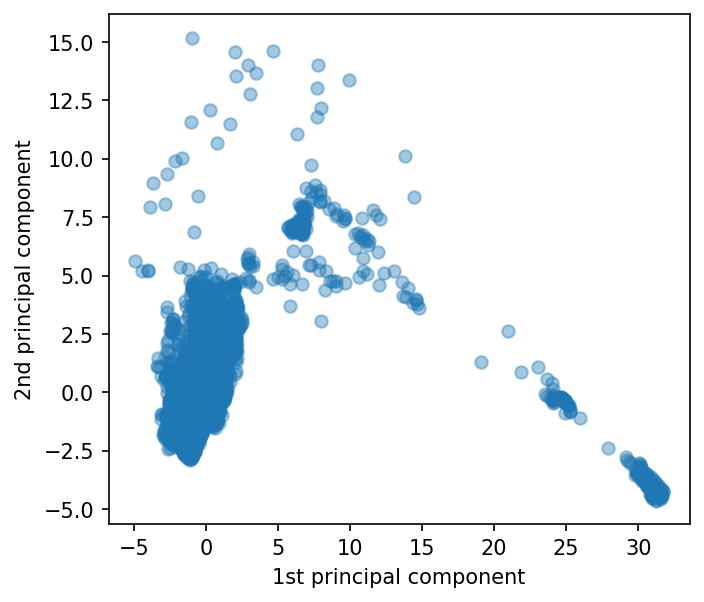

In [12]:
# Using built-in PCA function
from sklearn.decomposition import PCA

pca = PCA()
PC_projection = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(PC_projection[:, 0], PC_projection[:, 1], alpha = .4)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');

Create a scree plot where the x-axis is the number of the principal component and the y-axis the explained variance of each component (not cumulative). 

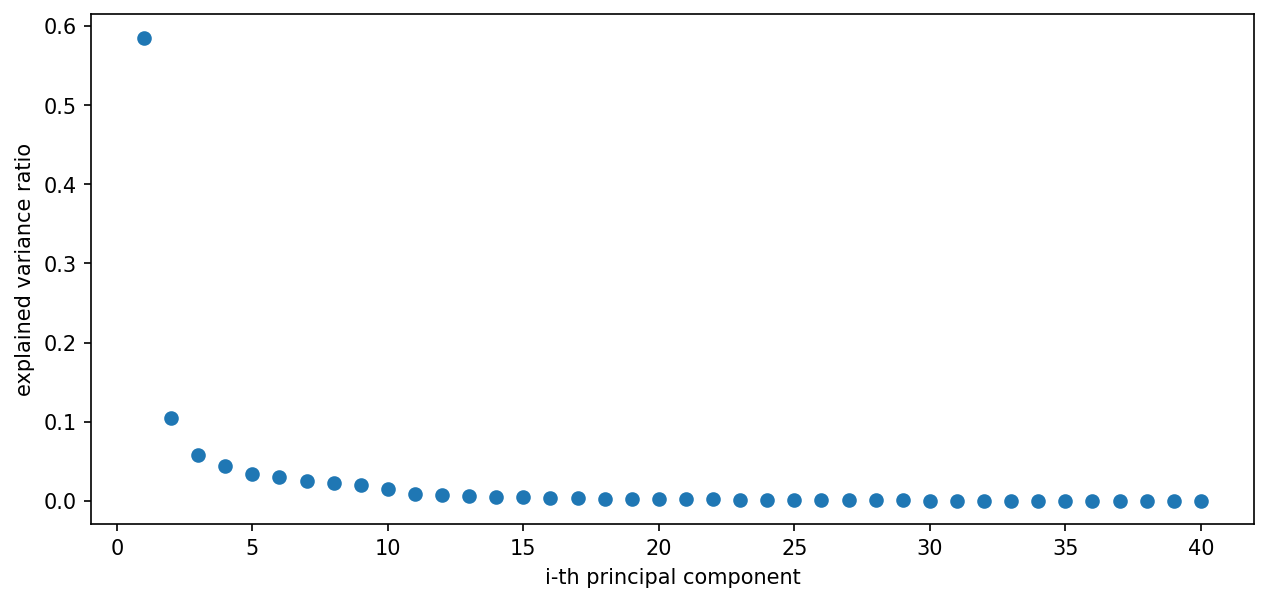

In [18]:
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)

ax.plot(range(1, 41), pca.explained_variance_ratio_, 'o')
ax.set_xlabel('i-th principal component')
ax.set_ylabel('explained variance ratio');

In this problem, you will train a `LinearRegression` model to predict the `y` data with each of the principal components and see how the model performance changes for each of the principal components. Create a plot of **$\mathrm{r^2}$ vs. principal component vector number**.

- Declare a `LinearRegression(fit_intercept=True)` model and train it with the data projected onto the ***i***-th principal component where ***i*** ranges from 0 to 39. You do not need to perform a train/test split, since there is no risk of overfitting with only one fitted parameter and >10K data points.
- Obtain the $\mathrm{r^2}$ on the full dataset for each model and plot (`i`, `r2_i`).

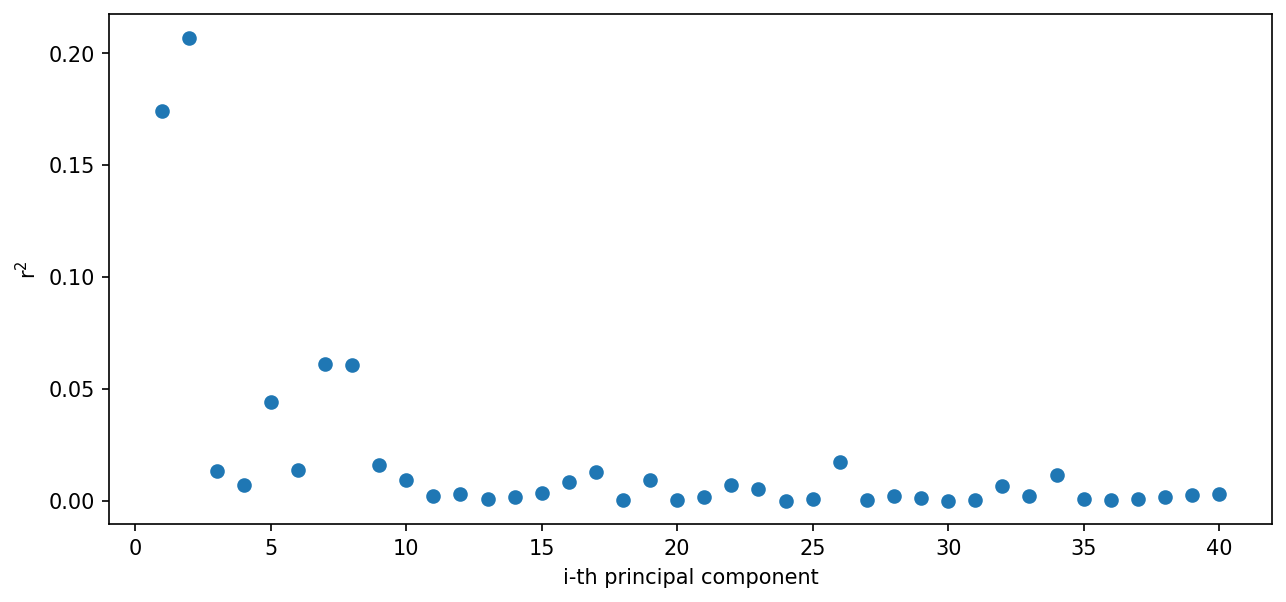

In [17]:
from sklearn.linear_model import LinearRegression

r2 = []

for i in range(PC_projection.shape[1]):
    lr = LinearRegression(fit_intercept = True)
    lr.fit(PC_projection[:, i].reshape(-1, 1), y)
    r2.append(lr.score(PC_projection[:, i].reshape(-1, 1), y))
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(range(1, 41), r2, 'o')
ax.set_xlabel('i-th principal component')
ax.set_ylabel('$\mathrm{r^2}$');

Compare the scree plot (variance explained by each component) to the r$^2$ plot (correlation between each component and the target data). Explain why the plots do not look the same. 

They are basically showing mathematically different things. The scree plot shows the variance of each principal component while the $\mathrm{r^2}$ shows the linear correlation between each component and the target values.

Create the best model you can using only three fitted parameters of a linear model (this could be three slopes, or two slopes and an intercept). You can use any strategy you like, including feature scaling, but any model with an r$^2$ score of at least 0.3 will be considered correct.

### Example

I will just choose the first 2 principal components since both of them gives $\mathrm{r^2}$ greater than 0.15 in which case I conjecture using both will result in $\mathrm{r^2}$ of 0.3.

In [20]:
lr = LinearRegression(fit_intercept = True)

# pick the first 2 PCs
first_2_PC = PC_projection[:, [0, 1]]

lr.fit(first_2_PC, y)

print('r2 = {}'.format(lr.score(first_2_PC, y)))

r2 = 0.3809036822944312


Briefly describe the strategy you used to create the model.